In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read 10x dataset
adata_og = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata_og.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [2]:
adata_filt = sc.pp.recipe_zheng17(adata_og, copy=True)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


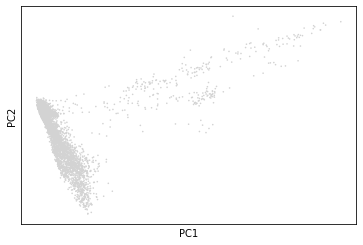

In [3]:
sc.tl.pca(adata_filt)
sc.pl.pca(adata_filt)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


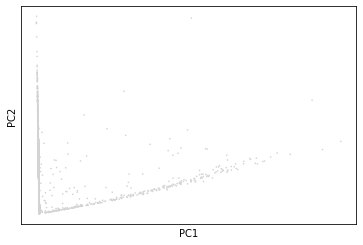

In [4]:
sc.tl.pca(adata_og)
sc.pl.pca(adata_og)

In [5]:
sc.pp.neighbors(adata_filt)
sc.tl.leiden(adata_filt)
print(adata_filt)

AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


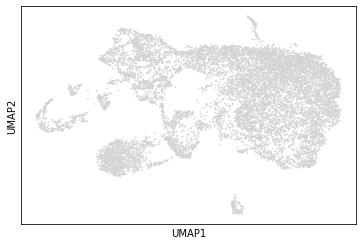

In [6]:
sc.tl.umap(adata_filt)
sc.pl.umap(adata_filt)

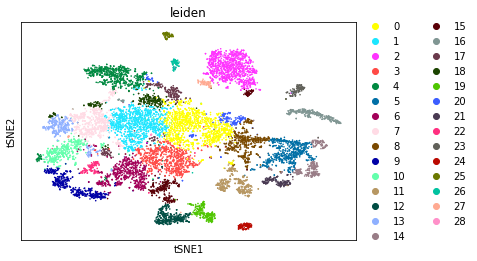

In [7]:
sc.tl.tsne(adata_filt)
sc.pl.tsne(adata_filt, color='leiden')

In [8]:
sc.tl.rank_genes_groups(adata_filt, groupby='leiden', method='logreg')

/opt/anaconda3/envs/scanpy/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


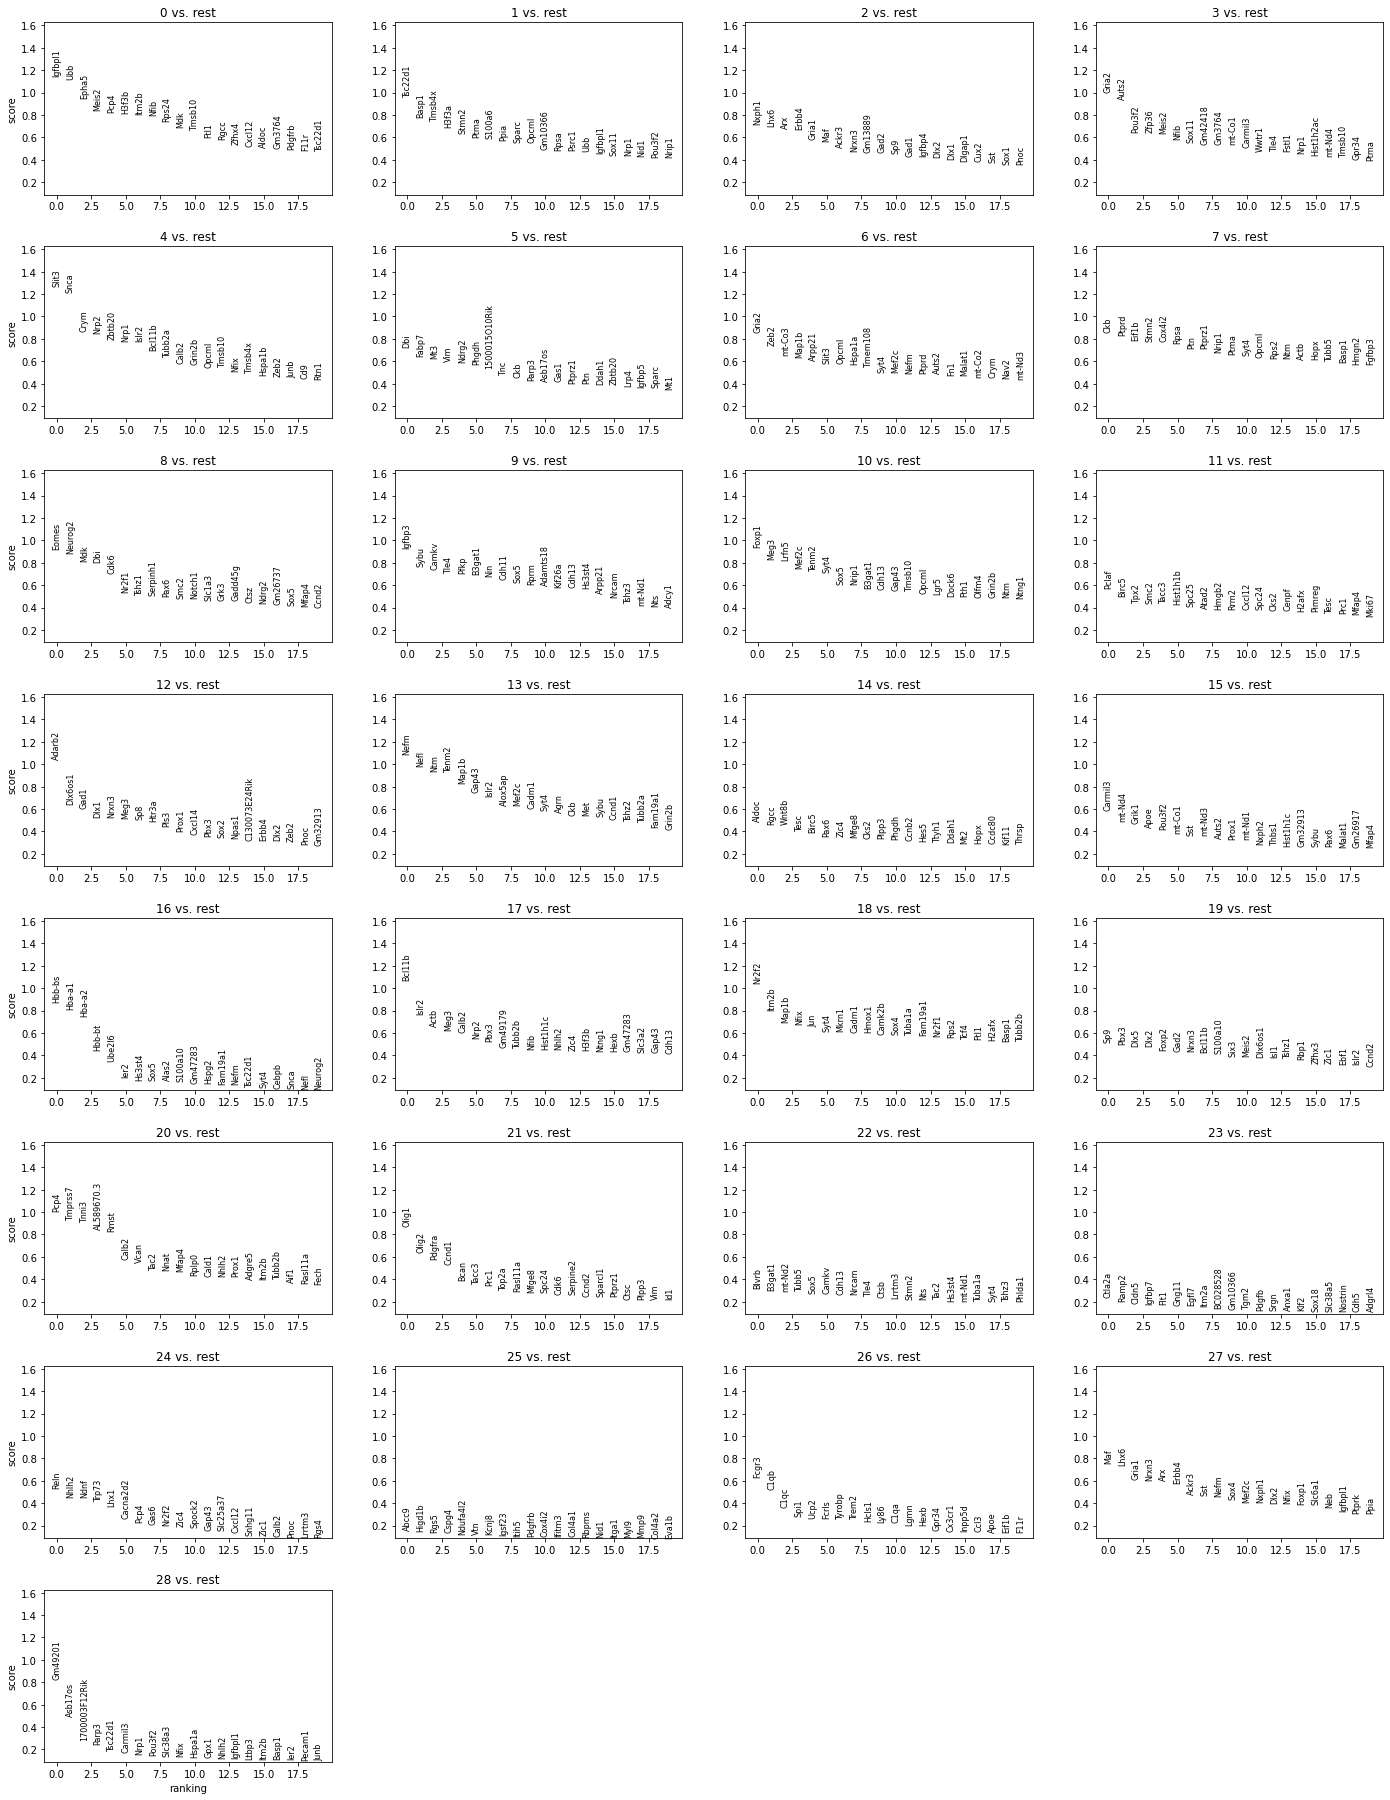

In [9]:
sc.pl.rank_genes_groups(adata_filt)

In [10]:
sc.tl.rank_genes_groups(adata_filt, groupby='leiden', method='t-test')

/opt/anaconda3/envs/scanpy/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


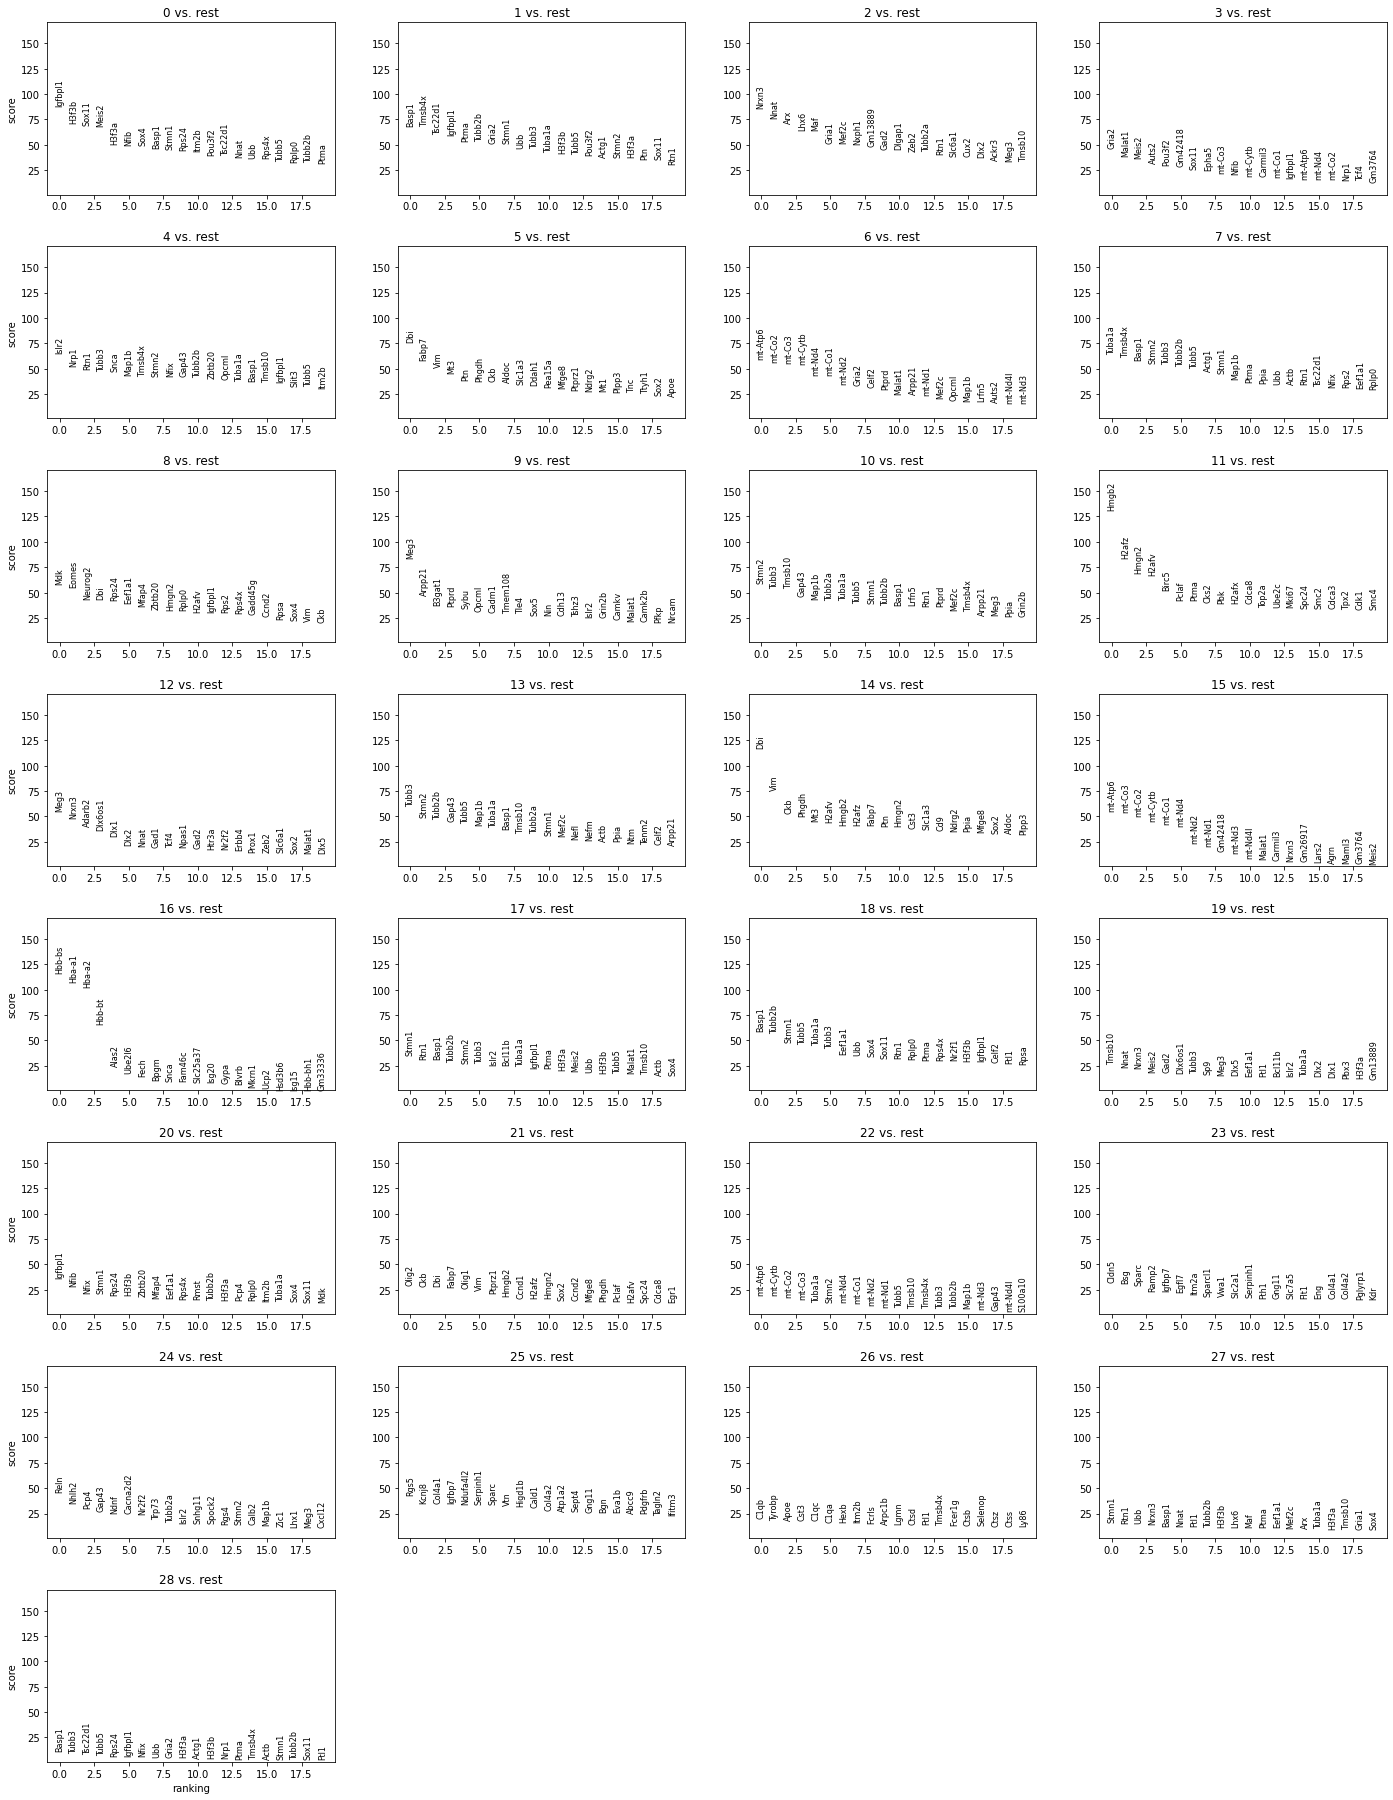

In [11]:
sc.pl.rank_genes_groups(adata_filt)

Specific genes: <br>
APOE <br>
APOLD1 in endothelial cells <br>
CCL4 in microglia <br>
CCL3 in microglia <br>
RELN in neurons <br>
PDGFRA in OPCs <br>
HBB-BS

In [12]:
gene_names = adata_filt.var.index.tolist()
gene_names.sort()
gene_names

['0610033M10Rik',
 '1500015O10Rik',
 '1700003F12Rik',
 '1700010G06Rik',
 '1700021A07Rik',
 '1700047G03Rik',
 '1700060O08Rik',
 '1700092M07Rik',
 '1700125G22Rik',
 '2010005H15Rik',
 '2010110E17Rik',
 '2200002D01Rik',
 '2310031A07Rik',
 '2410021H03Rik',
 '2810432F15Rik',
 '4921508D12Rik',
 '4921514A10Rik',
 '4930428O21Rik',
 '4930440I19Rik',
 '4930455J16Rik',
 '4930484H19Rik',
 '4930509J09Rik',
 '4930557F10Rik',
 '4932702P03Rik',
 '4933400C23Rik',
 '4933405O20Rik',
 '4933406B17Rik',
 '4933406J10Rik',
 '4933408J17Rik',
 '4933408N05Rik',
 '5430427O19Rik',
 '6330410L21Rik',
 '6430628N08Rik',
 '8430408G22Rik',
 'A730046J19Rik',
 'A930014E10Rik',
 'AC149090.1',
 'AC164881.1',
 'AL589670.3',
 'AL589670.4',
 'AL590144.2',
 'AU021092',
 'Abca1',
 'Abca8a',
 'Abcc9',
 'Ace2',
 'Ackr3',
 'Actb',
 'Actg1',
 'Adamts10',
 'Adamts18',
 'Adamtsl2',
 'Adarb2',
 'Adcy1',
 'Adgre5',
 'Adgrf4',
 'Adgrl4',
 'Adm',
 'Adora2a',
 'Agbl2',
 'Agrn',
 'Ahnak',
 'Aicda',
 'Aif1',
 'Alas2',
 'Aldh1a3',
 'Aldh1l1',


Plot by gene expression (Tsne)

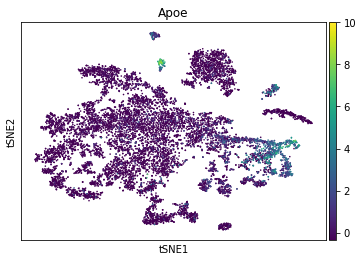

In [13]:
sc.pl.tsne(adata_filt, color="Apoe", vmax=10) #Microglia?

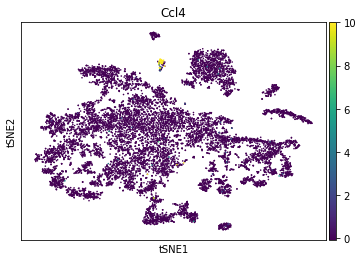

In [14]:
sc.pl.tsne(adata_filt, color="Ccl4", vmax=10) #microglia

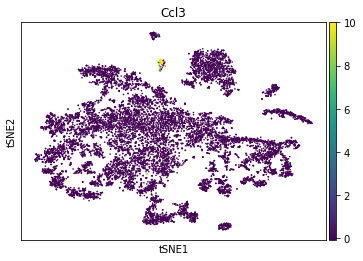

In [15]:
sc.pl.tsne(adata_filt, color="Ccl3", vmax=10) #microglia

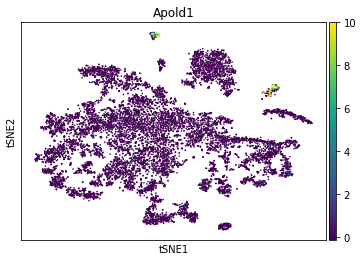

In [16]:
sc.pl.tsne(adata_filt, color="Apold1", vmax=10) #endothelial cells

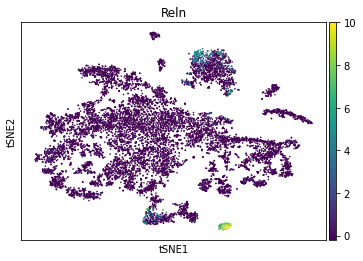

In [17]:
sc.pl.tsne(adata_filt, color="Reln", vmax=10) #neurons

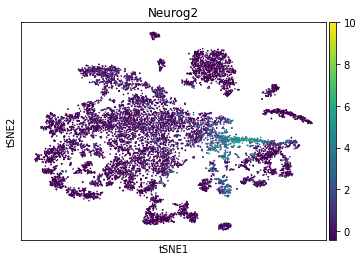

In [18]:
sc.pl.tsne(adata_filt, color="Neurog2", vmax=10) #Oligodendrocyte precursor

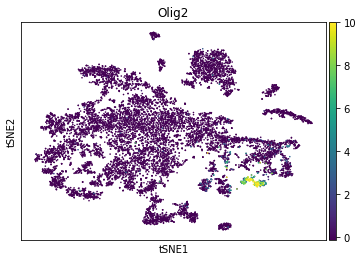

In [19]:
sc.pl.tsne(adata_filt, color="Olig2", vmax=10) #Oligodendrocyte

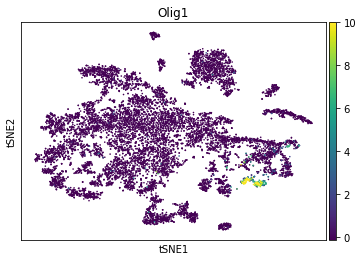

In [20]:
sc.pl.tsne(adata_filt, color="Olig1", vmax=10) #Oligodendrocyte

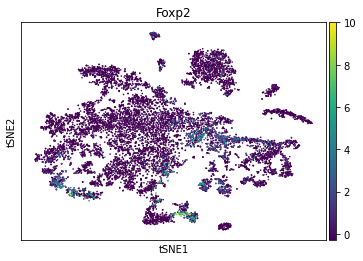

In [21]:
sc.pl.tsne(adata_filt, color="Foxp2", vmax=10) 

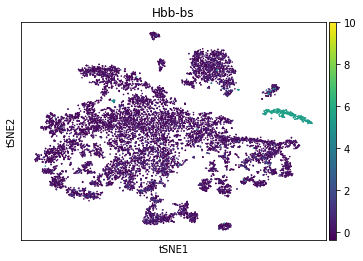

In [22]:
sc.pl.tsne(adata_filt, color="Hbb-bs", vmax=10) #Hemoglobin?

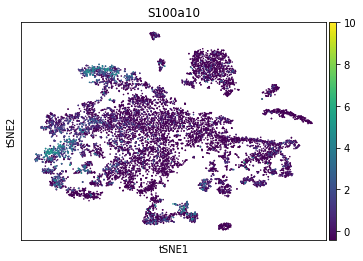

In [28]:
sc.pl.tsne(adata_filt, color="S100a10", vmax=10) #Schwann cell

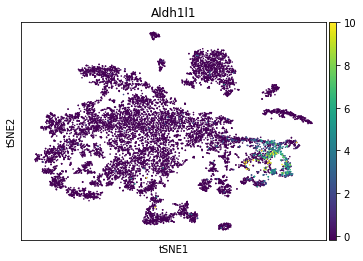

In [33]:
sc.pl.tsne(adata_filt, color="Aldh1l1", vmax=10) #Astrocyte

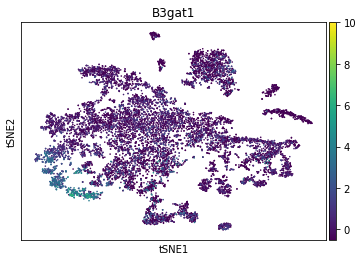

In [39]:
sc.pl.tsne(adata_filt, color="B3gat1", vmax=10) #glucuronyltransferase

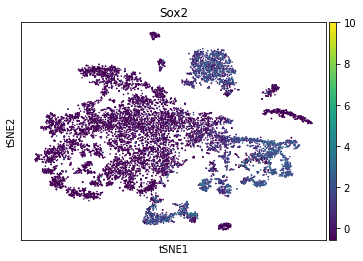

In [42]:
sc.pl.tsne(adata_filt, color="Sox2", vmax=10) #Neuroepithelial cells

In [36]:
gene_names

['0610033M10Rik',
 '1500015O10Rik',
 '1700003F12Rik',
 '1700010G06Rik',
 '1700021A07Rik',
 '1700047G03Rik',
 '1700060O08Rik',
 '1700092M07Rik',
 '1700125G22Rik',
 '2010005H15Rik',
 '2010110E17Rik',
 '2200002D01Rik',
 '2310031A07Rik',
 '2410021H03Rik',
 '2810432F15Rik',
 '4921508D12Rik',
 '4921514A10Rik',
 '4930428O21Rik',
 '4930440I19Rik',
 '4930455J16Rik',
 '4930484H19Rik',
 '4930509J09Rik',
 '4930557F10Rik',
 '4932702P03Rik',
 '4933400C23Rik',
 '4933405O20Rik',
 '4933406B17Rik',
 '4933406J10Rik',
 '4933408J17Rik',
 '4933408N05Rik',
 '5430427O19Rik',
 '6330410L21Rik',
 '6430628N08Rik',
 '8430408G22Rik',
 'A730046J19Rik',
 'A930014E10Rik',
 'AC149090.1',
 'AC164881.1',
 'AL589670.3',
 'AL589670.4',
 'AL590144.2',
 'AU021092',
 'Abca1',
 'Abca8a',
 'Abcc9',
 'Ace2',
 'Ackr3',
 'Actb',
 'Actg1',
 'Adamts10',
 'Adamts18',
 'Adamtsl2',
 'Adarb2',
 'Adcy1',
 'Adgre5',
 'Adgrf4',
 'Adgrl4',
 'Adm',
 'Adora2a',
 'Agbl2',
 'Agrn',
 'Ahnak',
 'Aicda',
 'Aif1',
 'Alas2',
 'Aldh1a3',
 'Aldh1l1',


In [40]:
adata_filt.obs['cell_type'] = 'NA'
adata_filt.obs.loc[(adata_filt.obs['leiden'] == '26'),'cell_type'] = "microglia"
adata_filt.obs.loc[(adata_filt.obs['leiden'] == '24'),'cell_type'] = "neurons"
adata_filt.obs.loc[(adata_filt.obs['leiden'] == '25'),'cell_type'] = "endothelial cells"
adata_filt.obs.loc[(adata_filt.obs['leiden'] == '17'),'cell_type'] = "oligodendrocytes"
adata_filt.obs.loc[(adata_filt.obs['leiden'] == '5'),'cell_type'] = "oligodendrocyte precursors"
adata_filt.obs.loc[(adata_filt.obs['leiden'] == '16'),'cell_type'] = "hemoglobin gene"
adata_filt.obs.loc[(adata_filt.obs['leiden'] == '10'),'cell_type'] = "schwann cells"
adata_filt.obs.loc[(adata_filt.obs['leiden'] == '14'),'cell_type'] = "astrocytes"
adata_filt.obs.loc[(adata_filt.obs['leiden'] == '9'),'cell_type'] = "glucuronyltransferase"
adata_filt.obs

,n_counts_all,leiden,cell_type
AAACCCAAGCAACTCT-1,1421.0,5,oligodendrocyte precursors
AAACCCACACGCGGTT-1,5833.0,3,NA
AAACCCACAGCATACT-1,2978.0,5,oligodendrocyte precursors
AAACCCACATACCATG-1,3599.0,2,NA
AAACCCAGTCGCACAC-1,9152.0,8,NA
...,...,...,...
TTTGTTGGTAGCTAAA-1,9756.0,1,NA
TTTGTTGGTATCCCAA-1,4231.0,3,NA
TTTGTTGGTCCGAAAG-1,2415.0,1,NA
TTTGTTGGTTCAACGT-1,6103.0,0,NA


... storing 'cell_type' as categorical


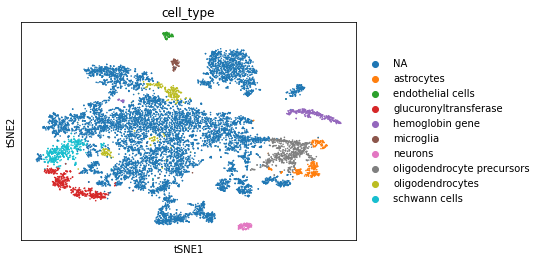

In [41]:
sc.pl.tsne(adata_filt, color='cell_type')